<a href="https://colab.research.google.com/github/aravali324/project/blob/master/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# to divide train and test set
from sklearn.model_selection import train_test_split
# feature scaling
from sklearn.preprocessing import MinMaxScaler
# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
"Good Job"

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [28]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
# load dataset
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/project_uottawa/multi_class_dataset.csv")
data.head(20)

,Age,Height,Weight,Diagnosis\n1: DM,Diagnosis\n1: Hypertension,Diagnosis\n1: Dyslipidemia,Diagnosis\n1: Hyperuricemia,"Diagnosis\n1: Valve (AS, MS, AR, MR)","Diagnosis\nCardiomyopathy\n(HCM, dHCM, DCM, Takotsubo)",Diagnosis\n1: CKD,Diagnosis\nDialysis due to HT/DM,Diagnosis\ndue to nephritis etc,Diagnosis\nAf,Smoking/day,Start smoking\n(Age),Stop smoking\n(Age),1: Current smoker,HDL,LDL,TG,hsCRP,BS,HbA1c,eGFR,Neck echo\nmax IMT (max),Neck echo\nmean IMT (ave),Neck echo\nPlaque(>1.5mm),Neck echo\nCCA-PSV (max),Neck echo\nICA-PSV(max),Neck echo\nVA-PSV(max),Neck echo\nCCA\nSignificant stenosis,Neck echo\nICA\nSignificant stenosis,Neck echo\nECA\nSignificant stenosis,Neck echo\nVA\nSignificant stenosis,UCG\nLVDd,UCG\nLVDs,UCG\nIVS,UCG\nPW,UCG\nEF,UCG\nAoD,UCG\nLAD,"UCG\nMR(0:none, 1:trivial, 2:mild, 3: moderate, 4: severe)","UCG\nMS(0:none, 1:trivial, 2:mild, 3: moderate, 4: severe)","UCG\nAR(0:none, 1:trivial, 2:mild, 3: moderate, 4: severe)","UCG\nAS(0:none, 1:trivial, 2:mild, 3: moderate, 4: severe)","UCG\nTR(0:none, 1:trivial, 2:mild, 3: moderate, 4: severe)",UCG\nPGTR,UCG\nAsynagy,Rt-CAVI,Lt-CAVI,Rt-ABI,Lt-ABI,SBP (Ave),DBP(Ave),class
0,57,167.0,53.0,0,0,0,0,0,1,0,0,0,0,10,20,52,0,65,44,96,22.20,101,5.8,73.6,0.92,0.725,0,55.4,56.2,53.7,0,0,0,0,59,53,10,10,23,34,36,1,0,0,0,1,20,0,8.9,8.4,1.11,1.15,135.5,83.5,1
1,62,174.0,76.0,1,1,0,1,0,0,0,0,0,0,20,20,62,1,41,53,184,79.84,84,5.6,96.7,1.07,0.765,0,56.8,73.1,60.7,0,0,0,0,50,36,12,9,53,38,40,1,0,2,0,1,13,1,9.8,9.8,1.19,1.17,161.5,113.0,4
2,72,165.5,73.0,1,1,1,0,0,0,0,0,0,0,15,40,72,1,31,69,388,39.51,193,8.5,53.3,1.50,1.100,1,89.3,84.9,56.8,0,0,0,0,49,32,12,12,63,37,39,1,0,2,0,2,7,1,9.2,9.3,1.10,1.14,131.0,74.5,4
3,81,151.2,49.8,1,0,1,0,0,0,0,0,0,0,30,18,45,0,28,50,107,752.61,116,7.0,35.4,3.03,1.090,1,75.9,67.3,76.3,0,0,0,0,40,25,12,10,67,34,38,1,0,0,0,2,26,1,9.2,9.5,0.80,0.82,140.5,73.5,4
4,54,173.0,59.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,41,191,123,100.43,111,6.3,92.7,0.96,0.720,1,119.0,92.0,73.2,0,0,0,0,48,29,10,10,68,30,37,2,0,1,0,1,22,1,9.0,8.6,1.22,1.13,147.0,92.0,2
5,69,166.0,77.8,0,0,1,1,0,0,0,0,1,0,30,20,40,0,39,78,200,710.24,108,7.0,4.9,1.00,0.815,1,82.2,84.0,53.6,0,0,0,0,50,37,10,10,50,39,43,2,0,0,0,0,7,1,5.5,5.8,1.07,1.03,103.0,65.0,4
6,59,159.0,51.5,0,0,0,0,0,0,0,0,0,0,15,20,59,1,44,143,130,43.95,86,5.8,82.3,1.14,0.790,1,80.4,84.9,42.6,0,0,0,0,55,41,8,10,49,34,38,2,0,0,0,2,25,1,7.4,7.4,1.05,1.01,108.0,70.0,2
7,75,158.5,57.0,1,1,1,1,0,0,0,0,0,0,20,20,45,0,46,82,90,104.21,87,6.5,54.4,1.75,1.210,1,86.7,88.4,52.7,0,0,0,0,50,39,12,8,42,38,42,2,0,0,0,2,18,1,8.3,8.8,0.91,1.05,140.0,81.5,4
8,75,158.0,65.5,1,1,0,0,0,0,0,0,0,0,20,20,50,0,41,116,139,237.94,101,6.5,61.6,1.09,0.800,1,75.0,69.4,73.9,0,0,0,1,45,30,12,12,62,38,43,1,0,0,0,2,25,1,10.3,10.2,1.18,1.05,154.5,86.0,3
9,76,164.5,58.0,0,0,0,0,1,0,0,0,0,1,20,20,69,0,69,125,124,13.45,101,6.0,51.5,1.00,0.740,1,58.1,48.6,62.3,0,0,0,0,46,30,10,10,62,34,43,3,0,1,0,2,26,1,7.4,6.8,1.13,1.04,110.0,84.5,4


In [30]:
# let's inspect the type of variables in pandas
data.dtypes

Age                                                             int64
Height                                                        float64
Weight                                                        float64
Diagnosis\n1: DM                                                int64
Diagnosis\n1: Hypertension                                      int64
Diagnosis\n1: Dyslipidemia                                      int64
Diagnosis\n1: Hyperuricemia                                     int64
Diagnosis\n1: Valve (AS, MS, AR, MR)                            int64
Diagnosis\nCardiomyopathy\n(HCM, dHCM, DCM, Takotsubo)          int64
Diagnosis\n1: CKD                                               int64
Diagnosis\nDialysis due to HT/DM                                int64
Diagnosis\ndue to nephritis etc                                 int64
Diagnosis\nAf                                                   int64
Smoking/day                                                     int64
Start smoking\n(Age)

In [31]:
# let's visualise the percentage of missing values
data.isnull().mean()

Age                                                           0.0
Height                                                        0.0
Weight                                                        0.0
Diagnosis\n1: DM                                              0.0
Diagnosis\n1: Hypertension                                    0.0
Diagnosis\n1: Dyslipidemia                                    0.0
Diagnosis\n1: Hyperuricemia                                   0.0
Diagnosis\n1: Valve (AS, MS, AR, MR)                          0.0
Diagnosis\nCardiomyopathy\n(HCM, dHCM, DCM, Takotsubo)        0.0
Diagnosis\n1: CKD                                             0.0
Diagnosis\nDialysis due to HT/DM                              0.0
Diagnosis\ndue to nephritis etc                               0.0
Diagnosis\nAf                                                 0.0
Smoking/day                                                   0.0
Start smoking\n(Age)                                          0.0
Stop smoki

In [32]:
data.describe()

,Age,Height,Weight,Diagnosis\n1: DM,Diagnosis\n1: Hypertension,Diagnosis\n1: Dyslipidemia,Diagnosis\n1: Hyperuricemia,"Diagnosis\n1: Valve (AS, MS, AR, MR)","Diagnosis\nCardiomyopathy\n(HCM, dHCM, DCM, Takotsubo)",Diagnosis\n1: CKD,Diagnosis\nDialysis due to HT/DM,Diagnosis\ndue to nephritis etc,Diagnosis\nAf,Smoking/day,Start smoking\n(Age),Stop smoking\n(Age),1: Current smoker,HDL,LDL,TG,hsCRP,BS,HbA1c,eGFR,Neck echo\nmax IMT (max),Neck echo\nmean IMT (ave),Neck echo\nPlaque(>1.5mm),Neck echo\nCCA-PSV (max),Neck echo\nICA-PSV(max),Neck echo\nVA-PSV(max),Neck echo\nCCA\nSignificant stenosis,Neck echo\nICA\nSignificant stenosis,Neck echo\nECA\nSignificant stenosis,Neck echo\nVA\nSignificant stenosis,UCG\nLVDd,UCG\nLVDs,UCG\nIVS,UCG\nPW,UCG\nEF,UCG\nAoD,UCG\nLAD,"UCG\nMR(0:none, 1:trivial, 2:mild, 3: moderate, 4: severe)","UCG\nMS(0:none, 1:trivial, 2:mild, 3: moderate, 4: severe)","UCG\nAR(0:none, 1:trivial, 2:mild, 3: moderate, 4: severe)","UCG\nAS(0:none, 1:trivial, 2:mild, 3: moderate, 4: severe)","UCG\nTR(0:none, 1:trivial, 2:mild, 3: moderate, 4: severe)",UCG\nPGTR,UCG\nAsynagy,Rt-CAVI,Lt-CAVI,Rt-ABI,Lt-ABI,SBP (Ave),DBP(Ave),class
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,72.844444,160.877778,60.982222,0.511111,0.600000,0.466667,0.355556,0.155556,0.066667,0.244444,0.044444,0.044444,0.20000,15.555556,12.955556,35.755556,0.244444,45.888889,89.755556,129.133333,499.252222,115.288889,6.362222,107.186667,1.436667,0.919222,0.844444,74.326667,77.882222,55.615556,0.111111,0.244444,0.0,0.044444,48.711111,34.044444,10.688889,10.066667,56.133333,33.133333,40.844444,1.600000,0.0,0.822222,0.533333,1.488889,20.177778,0.555556,8.944444,8.986667,1.006889,1.054222,128.611111,77.422222,2.866667
std,9.800175,10.178562,13.260695,0.505525,0.495434,0.504525,0.484090,0.366529,0.252262,0.434613,0.208409,0.208409,0.40452,16.963270,10.291116,29.175142,0.434613,14.510533,32.614244,81.231599,1227.414467,42.475459,0.853146,248.940381,0.536885,0.198692,0.366529,23.190010,38.034065,15.832259,0.317821,0.434613,0.0,0.208409,5.594731,8.434118,2.362801,1.250454,15.836666,4.256546,5.704685,0.863397,0.0,0.833636,1.140175,0.786887,10.216495,0.502519,2.394174,1.981918,0.188882,0.253041,23.181323,11.860915,1.198484
min,46.000000,137.500000,32.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,22.000000,39.000000,43.000000,13.040000,59.000000,5.200000,3.300000,0.740000,0.570000,0.000000,0.000000,31.000000,31.200000,0.000000,0.000000,0.0,0.000000,38.000000,23.000000,7.000000,7.000000,20.000000,22.000000,31.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.400000,0.450000,0.710000,82.000000,55.000000,1.000000
25%,68.000000,156.000000,53.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,34.000000,68.000000,81.000000,45.590000,93.000000,5.800000,35.400000,1.100000,0.765000,1.000000,59.700000,59.900000,45.100000,0.000000,0.000000,0.0,0.000000,45.000000,28.000000,10.000000,10.000000,49.000000,30.000000,37.000000,1.000000,0.0,0.000000,0.000000,1.000000,16.000000,0.000000,7.700000,7.600000,0.870000,0.890000,113.000000,70.000000,2.000000
50%,73.000000,162.000000,59.200000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,15.000000,18.000000,42.000000,0.000000,44.000000,84.000000,108.000000,104.210000,102.000000,6.100000,59.400000,1.300000,0.900000,

In [33]:
#For Class Balance 
count_4, count_1,count_3, count_2=data['class'].value_counts()
count_1, count_2, count_3, count_4


(9, 8, 8, 20)

In [0]:
from imblearn.over_sampling import SMOTE
data1 = data
smt = SMOTE(random_state=42)
smot_sample_target=data['class']
data1.drop('class',axis=1,inplace=True)


In [0]:
smot_data, smote_target = smt.fit_sample(data1, smot_sample_target)
smote_dataframe = pd.DataFrame(data= smot_data)
smote_targetdataframe = pd.DataFrame(data= smote_target)
df_norm1 = (smote_dataframe - smote_dataframe.mean()) / (smote_dataframe.max() - smote_dataframe.min()+0.0001)

In [0]:
testing = pd.concat([df_norm1, smote_targetdataframe], axis=1)

In [0]:
testing.to_excel("robin.xlsx")


In [0]:
df_norm12 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/project_uottawa/INPUT.csv")
df_norm123 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/project_uottawa/TESTING.csv")

In [0]:
target1 = df_norm12[df_norm12.columns[-1]]
df_norm12.drop(df_norm12.columns[-1], axis=1, inplace=True)
target2 = df_norm123[df_norm123.columns[-1]]
df_norm123.drop(df_norm123.columns[-1], axis=1, inplace=True)

In [361]:
df_norm12.shape

(60, 54)

# Correlation between variables

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

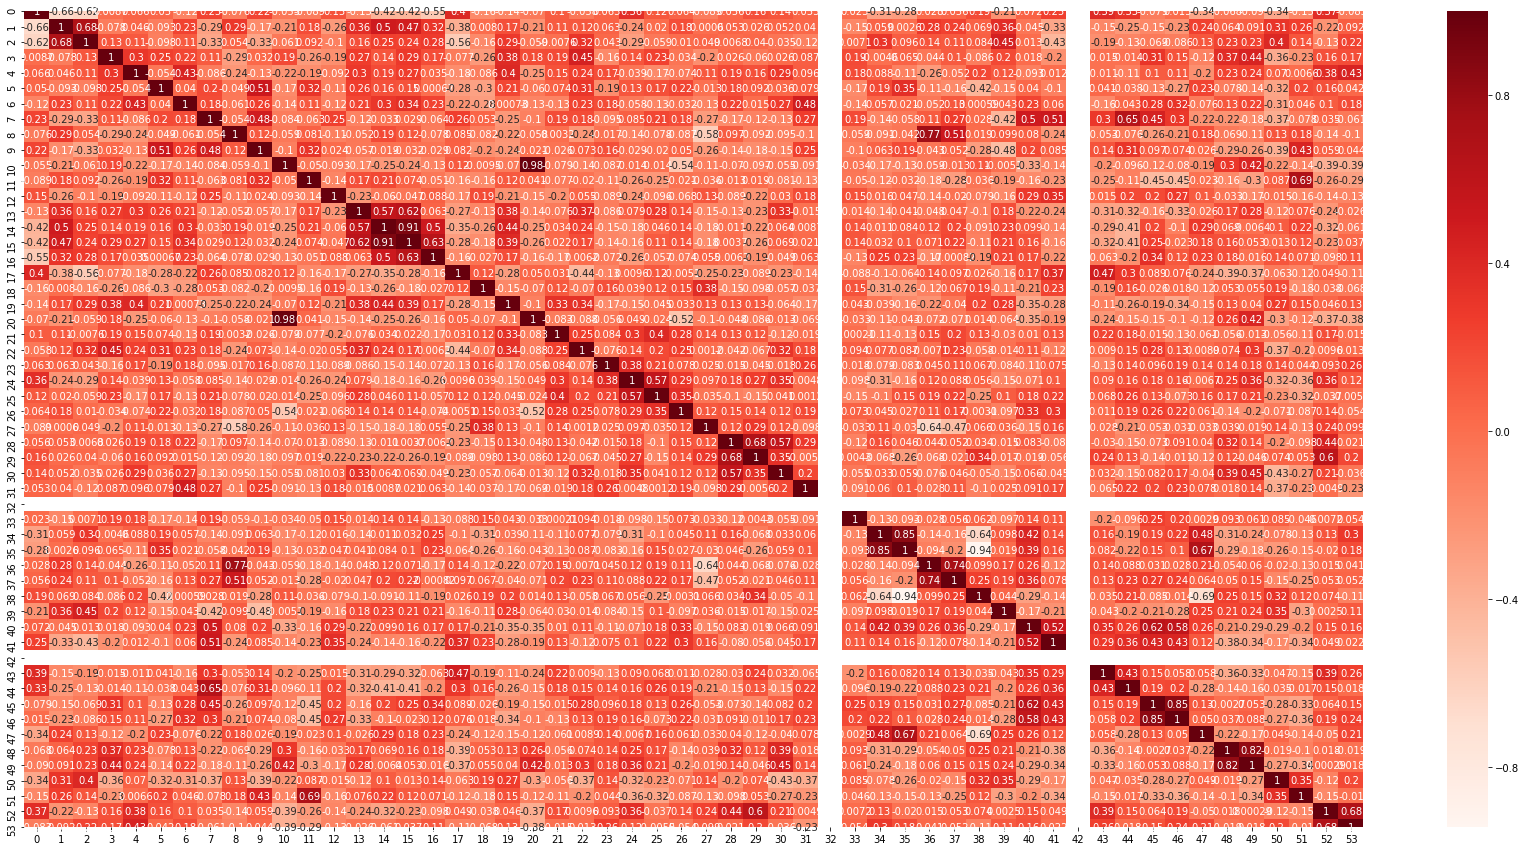

In [290]:
plt.figure(figsize=(30,15))
cor = df_norm12.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [326]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df_norm12, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  6


In [327]:
corr_features

{'15', '20', '35', '38', '46', '49'}

In [0]:
df_correlated = df_norm12
df_correlated_test = df_norm123

In [0]:
df_correlated.drop(labels=corr_features , axis=1, inplace=True)
df_correlated_test.drop(labels=corr_features , axis=1, inplace=True)

In [357]:
df_correlated.shape

(60, 48)

In [340]:
# Let's separate into train and test set
X_train1_correlated, X_test1_correlated, y_train1_correlated, y_test1_correlated = train_test_split(df_correlated, target1, test_size=0.00003,random_state=42)
X_train1_correlated.shape, X_test1.shape

X_train12_correlated, X_test12_correlated, y_train12_correlated, y_test12_correlated = train_test_split(df_correlated_test, target2, test_size=0.90,random_state=42)
X_train1_correlated.shape, X_test1_correlated.shape
X_train12_correlated.shape, X_test12_correlated.shape

((2, 48), (18, 48))

In [0]:
# Ada Boost Classifier
classifier = AdaBoostClassifier(random_state=0, n_estimators=285)
classifier.fit(X_train1_correlated,y_train1_correlated)
#Predicting the test set results
y_pred1_correlated = classifier.predict(X_test12_correlated)
ac1_correlated =accuracy_score(y_test12_correlated, y_pred1_correlated,normalize=True)
#confusion metrices
cm1_correlated = confusion_matrix(y_test12_correlated, y_pred1_correlated)

In [342]:
cm1_correlated, ac1_correlated

(array([[3, 1, 0, 1],
        [0, 4, 0, 0],
        [1, 2, 1, 0],
        [1, 1, 0, 3]]), 0.6111111111111112)

In [0]:
import xgboost as xgb
xgbr = xgb.XGBClassifier(objective= "multi:softprob", num_class = 4, num_round =50, max_depth=40, learning_rate=0.)
### validation set
xgbr.fit(X_train1_correlated, y_train1_correlated)
y_pred2_correlated  = xgbr.predict(X_test12_correlated)
ac2_correlated =accuracy_score(y_test12_correlated, y_pred2_correlated, normalize=True)
cm2_correlated = confusion_matrix(y_test12_correlated, y_pred2_correlated)

In [344]:
cm2_correlated, ac2_correlated 

(array([[5, 0, 0, 0],
        [4, 0, 0, 0],
        [4, 0, 0, 0],
        [5, 0, 0, 0]]), 0.2777777777777778)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbmr = GradientBoostingClassifier(learning_rate=0.00008)

#cross validation set
gbmr.fit(X_train1_correlated, y_train1_correlated)
y_pred3_correlated  = gbmr.predict(X_test12_correlated)
ac3_correlated= accuracy_score(y_test12_correlated, y_pred3,normalize=True)
cm3_correlated = confusion_matrix(y_test12_correlated, y_pred3_correlated)

In [346]:
cm3_correlated, ac3_correlated

(array([[5, 0, 0, 0],
        [0, 4, 0, 0],
        [1, 0, 3, 0],
        [1, 2, 2, 0]]), 0.7222222222222222)

## For Classification of targets

In [362]:
# Let's separate into train and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_norm12, target1, test_size=0.00003,random_state=42)
X_train1.shape, X_test1.shape

X_train12, X_test12, y_train12, y_test12 = train_test_split(df_norm123, target2, test_size=0.90,random_state=42)
X_train1.shape, X_test1.shape
X_train12.shape, X_test12.shape

((2, 54), (18, 54))

In [0]:
# Ada Boost Classifier
classifier = AdaBoostClassifier(random_state=0, n_estimators=100)
classifier.fit(X_train1,y_train1)
#Predicting the test set results
y_pred1 = classifier.predict(X_test12)
ac1 =accuracy_score(y_test12, y_pred1,normalize=True)
#confusion metrices
cm1 = confusion_matrix(y_test12, y_pred1)

In [364]:
ac1,cm1

(0.7777777777777778, array([[4, 0, 0, 1],
        [0, 4, 0, 0],
        [0, 0, 2, 2],
        [0, 0, 1, 4]]))

In [0]:
import xgboost as xgb
xgbr = xgb.XGBClassifier(objective= "multi:softprob", num_class = 4, num_round =50, max_depth=40, learning_rate=0.04)
### validation set
xgbr.fit(X_train1, y_train1)
y_pred2  = xgbr.predict(X_test12)
ac2=accuracy_score(y_test12, y_pred2,normalize=True)
cm2 = confusion_matrix(y_test12, y_pred2)

In [366]:
cm2, ac2

(array([[5, 0, 0, 0],
        [0, 4, 0, 0],
        [0, 0, 4, 0],
        [0, 0, 2, 3]]), 0.8888888888888888)

In [367]:
print(classification_report(y_test12,y_pred12))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.67      1.00      0.80         4
           4       1.00      0.60      0.75         5

    accuracy                           0.89        18
   macro avg       0.92      0.90      0.89        18
weighted avg       0.93      0.89      0.89        18



In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbmr = GradientBoostingClassifier(learning_rate=0.25)

#cross validation set
gbmr.fit(X_train1, y_train1)
y_pred3  = gbmr.predict(X_test12)
ac3= accuracy_score(y_test12, y_pred3,normalize=True)
cm3 = confusion_matrix(y_test12, y_pred3)

In [369]:
cm3, ac3

(array([[5, 0, 0, 0],
        [0, 3, 0, 1],
        [0, 0, 4, 0],
        [1, 0, 3, 1]]), 0.7222222222222222)